The approval, disapproval and dropout rates comprise a group called "school performance rates", where each one represents a percentage of total enrollment or remaining enrolled students (final balance of initial enrollment), considering the situations of transfers, admissions and reclassifications (entry and exit).

\begin{equation}
\text{ApprovalRate}_{y}=\frac{Approved_{y}}{Remaining_{y}} \times 100
\end{equation}

\begin{equation}
\text{FailureRate}_{y}=\frac{Failed_{y}}{Remaining_{y}} \times 100
\end{equation}

\begin{equation}
\text{DropoutRate}_{y}=100 - ({ApprovalRate}_{y} - {FailureRate}_{y})
\end{equation}


\begin{align*}
\text{where: }& \\
Approved_{y} &= \text{number of approved students in the year or group of years }y;\\
Failed_{y} &= \text{number of failed students in the year or group of years }y;\\
E_{y} &= \text{number of initial enrollments in the year or group of year }y ;\\
L_{y} &= \text{number of students who left due to dropout or transfer in the year or group of years }y;\\
A_{y} &= \text{number of students admitted by transfer in the year or group of years }y;\\
Rin_{y} &= \text{number of reclassified students in the year or group of years }y;\\
Rout_{y} &= \text{number of students who left in the year or group of years }y\text{, by reclassification;}\\
Remaining_{y} &= E_{y}-L_{y}+A_{y}+Rin_{y}-Rout_{y}.\\
& \text{(number of remaining students in the year or group of years $y$}\\
\text{and: }& \\
y &= \text{elementary school (year, }1^{\mathrm{st}}\text{ to }4^{\mathrm{th}}, 5^{\mathrm{th}}\text{ to }9^{\mathrm{th}}, total)\text{, high school (year, total).}
\end{align*}

Reference for INEP Rates formulas: <https://download.inep.gov.br/publicacoes/institucionais/estatisticas_e_indicadores/dicionario_de_indicadores_educacionais_formulas_de_calculo.pdf> (pag. 19)

Reclassification is a process that can take place during the academic year, in which a student who enters a certain grade can be reassigned, due to a previous assessment, to a more advanced grade, different from the grade corresponding to their initial enrollment. This student is evaluated in the grade to which he/she was reassigned, receiving the status of pass, fail or drop out.

### RQ5. Did the pandemic increase the school dropout rate?

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data of all available years of School Dropout Rates

In [3]:
data = pd.read_csv('data/final_performance_school_dropout.csv')
data

,Ano,Rede,Localização,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EF,1EM,2EM,3EM,4EM,Não-Seriado,Total - EM
0,2007,Estadual,Rural,3.600000,6.3,4.1,4.2,4.9,7.4,6.900000,6.5,6.7,6.0,18.3,14.1,10.2,10.200000,15.500000,14.9
1,2007,Federal,Rural,1.358704,0.0,0.0,0.0,0.0,0.0,3.046215,4.8,0.0,1.4,5.0,1.8,0.8,5.695618,3.000000,2.9
2,2007,Municipal,Rural,4.300000,7.5,5.2,5.6,5.8,11.3,9.600000,9.7,8.3,7.0,19.0,13.4,8.4,3.700000,11.700000,14.7
3,2007,Privada,Rural,1.300000,2.5,1.8,1.3,1.2,3.1,2.200000,2.1,1.2,1.9,2.7,1.2,0.8,2.200000,9.516116,1.7
4,2007,Pública,Rural,4.300000,7.4,5.1,5.5,5.7,10.6,9.100000,9.0,7.9,6.9,17.8,13.5,9.6,7.200000,11.800000,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020,Privada,Urbana,5.000000,3.1,2.4,1.9,1.4,1.1,0.900000,0.7,0.6,2.0,0.5,0.4,0.2,13.800000,5.800000,0.4
248,2020,Privada,Rural,3.600000,2.1,2.5,2.0,1.3,1.4,1.000000,1.0,1.4,1.9,5.6,3.1,3.1,4.200000,2.000000,4.2
249,2020,Pública,Total,0.500000,0.4,0.6,0.6,0.7,1.3,1.300000,1.2,1.1,0.8,2.9,2.3,2.1,7.800000,2.300000,2.6
250,2020,Pública,Urbana,0.500000,0.4,0.5,0.5,0.6,1.3,1.200000,1.0,1.0,0.8,2.9,2.3,2.2,7.800000,2.500000,2.5


## Filtering the totals of School Dropouts Rates of Elementary School and High School

In [4]:
# EF - Ensino Fundamental - Ementary School
# EM - Ensino Médio - High School
totals = data.query('Rede == "Total" and Localização == "Total"')[['Ano','Total - EF', 'Total - EM']]
totals

,Ano,Total - EF,Total - EM
11,2007,4.8,13.2
29,2008,4.4,12.8
36,2009,3.7,11.5
70,2010,3.1,10.3
72,2011,2.8,9.5
90,2012,2.7,9.1
108,2013,2.2,8.1
126,2014,2.2,7.6
144,2015,1.9,6.8
162,2016,1.9,6.6


## Ploting the line chart of the data

In [5]:
# Constants
x_shift = 0.13
y_shift = 0.15
markersize=9


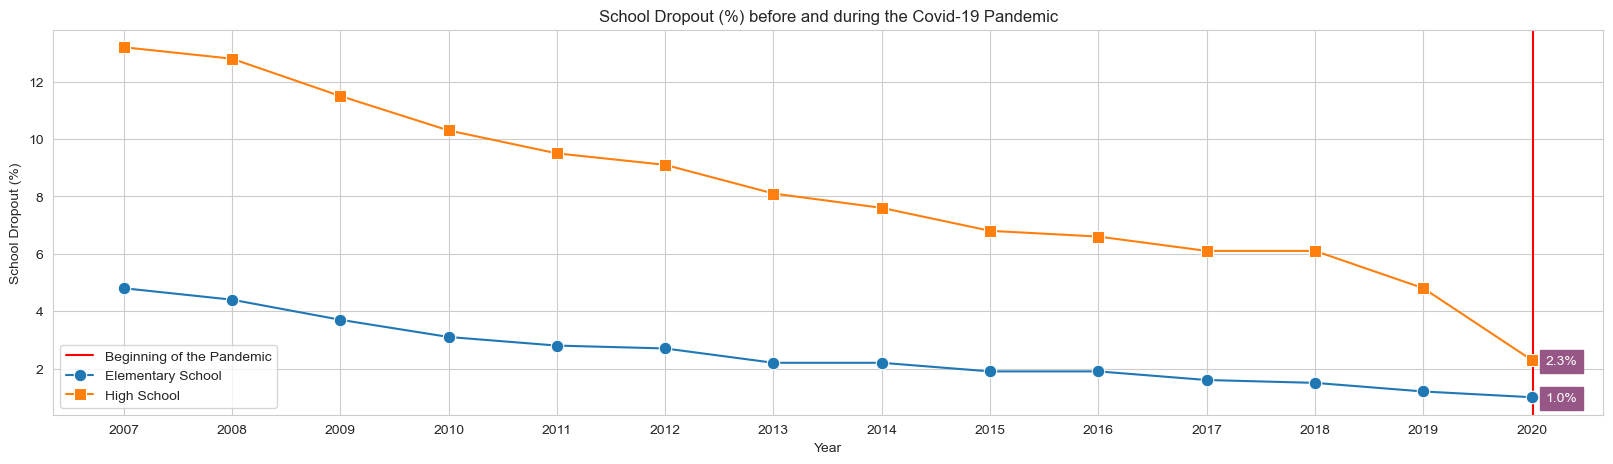

In [6]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
ax = sns.lineplot(data=totals, x='Ano', y='Total - EF', label="Elementary School", marker="o", markersize=markersize)
ax.set(xticks=totals.Ano.values)
sns.lineplot(data=totals, x='Ano', y='Total - EM', label="High School", marker="s", markersize=markersize)
plt.title("School Dropout (%) before and during the Covid-19 Pandemic")
plt.ylabel("School Dropout (%)")
plt.xlabel("Year")
y_2020_EM = totals[totals.Ano == 2020]['Total - EM'].iloc[0]
plt.text(2020+x_shift, y_2020_EM-y_shift, '{:.1f}%'.format(y_2020_EM), color='white').set_backgroundcolor('#965786')
y_2020_EF = totals[totals.Ano == 2020]['Total - EF'].iloc[0]
plt.text(2020+x_shift, y_2020_EF-y_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('#965786')
plt.legend()
plt.show()

* We can see a higher decrease in High School Rates during the Covid-19 Pandemic then in Elementary School Rates;
* But with this line chart visualization of the actual data it is not clear if this decrease is below the tendency of each case;
* The question does not mention a separate evaluation of each education level, but a general one;
* We chose to keep separate lines for each education level because an Arithmetic Avarage of the Dropout Rates is not equivalent of a global Dropout Rate calculated with the sum of total numbers of *Approved* and *Disapproved* students divided by the sum of total *Remaining* enrolled students of each education level. Since we do not have this information available, only the *ApprovalRate*, *DisapprovalRate* and *DropoutRate* of each education level.

Example of combining percentages: <http://jwilson.coe.uga.edu/EMT725/Percentages/Percentages.html><br />

## Ploting a linear regression line of the data

In [7]:
marker = 'o','s'

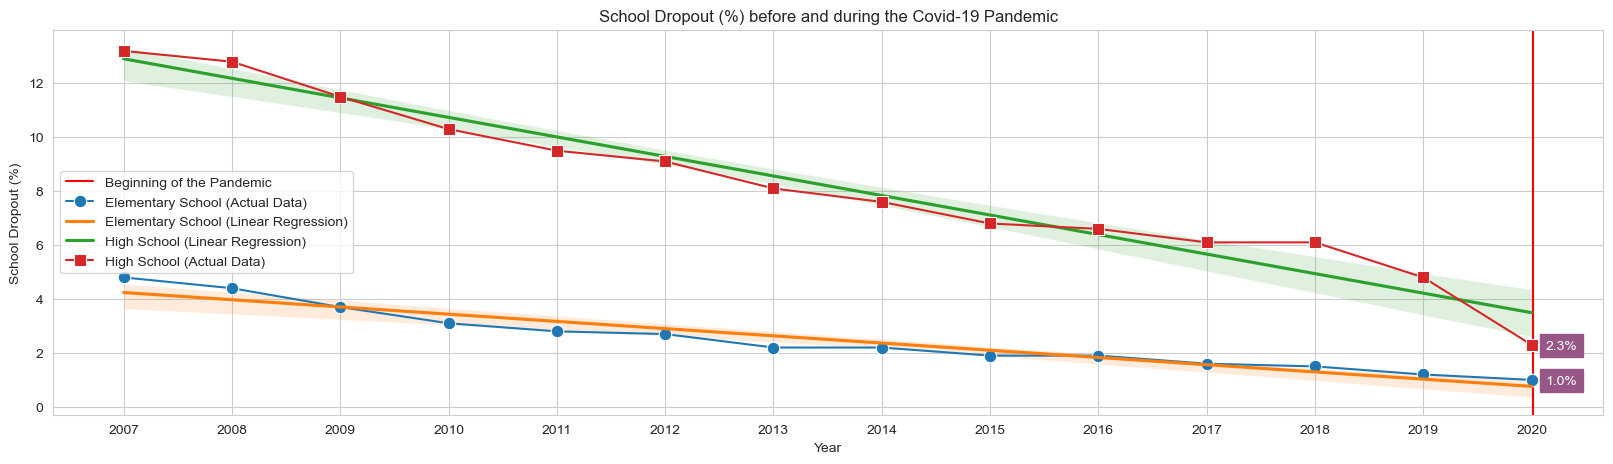

In [8]:
plt.figure(figsize=(20,5))
plt.axvline(x=2020.01, label="Beginning of the Pandemic", color='red', linestyle='-')
sns.set_style("whitegrid")
ax = sns.lineplot(data=totals, x='Ano', y='Total - EF', label="Elementary School (Actual Data)", marker="o", markersize=markersize)
ax = sns.regplot(data=totals, x='Ano', y='Total - EF', label="Elementary School (Linear Regression)", scatter=False)
ax.set(xticks=totals.Ano.values)
sns.regplot(data=totals, x='Ano', y='Total - EM', label="High School (Linear Regression)", scatter=False)
sns.lineplot(data=totals, x='Ano', y='Total - EM', label="High School (Actual Data)", marker="s", markersize=markersize)
plt.title("School Dropout (%) before and during the Covid-19 Pandemic")
plt.ylabel("School Dropout (%)")
plt.xlabel("Year")
y_2020_EM = totals[totals.Ano == 2020]['Total - EM'].iloc[0]
plt.text(2020+x_shift, y_2020_EM-y_shift, '{:.1f}%'.format(y_2020_EM), color='white').set_backgroundcolor('#965786')
y_2020_EF = totals[totals.Ano == 2020]['Total - EF'].iloc[0]
plt.text(2020+x_shift, y_2020_EF-y_shift, '{:.1f}%'.format(y_2020_EF), color='white').set_backgroundcolor('#965786')
# for index, row in totals.iterrows():
#     plt.text(code[row.Ano]+x_shift, row.Dropout-y_shift, row.Ano, color='white', fontsize='small', bbox=dict(facecolor='#965786', alpha=0.7))
plt.legend()
plt.show()

In [9]:
totals

,Ano,Total - EF,Total - EM
11,2007,4.8,13.2
29,2008,4.4,12.8
36,2009,3.7,11.5
70,2010,3.1,10.3
72,2011,2.8,9.5
90,2012,2.7,9.1
108,2013,2.2,8.1
126,2014,2.2,7.6
144,2015,1.9,6.8
162,2016,1.9,6.6


In [10]:
totals_ef = totals[['Ano', 'Total - EF']].reset_index(drop=True)
totals_ef['Level'] = 'Elementary School'
totals_ef.rename(columns={'Ano': 'Year', 'Total - EF': 'Dropout'}, inplace=True)
totals_ef


,Year,Dropout,Level
0,2007,4.8,Elementary School
1,2008,4.4,Elementary School
2,2009,3.7,Elementary School
3,2010,3.1,Elementary School
4,2011,2.8,Elementary School
5,2012,2.7,Elementary School
6,2013,2.2,Elementary School
7,2014,2.2,Elementary School
8,2015,1.9,Elementary School
9,2016,1.9,Elementary School


In [11]:
totals_em = totals[['Ano', 'Total - EM']].reset_index(drop=True)
totals_em['Level'] = 'High School'
totals_em.rename(columns={'Ano': 'Year', 'Total - EM': 'Dropout'}, inplace=True)
totals_em

,Year,Dropout,Level
0,2007,13.2,High School
1,2008,12.8,High School
2,2009,11.5,High School
3,2010,10.3,High School
4,2011,9.5,High School
5,2012,9.1,High School
6,2013,8.1,High School
7,2014,7.6,High School
8,2015,6.8,High School
9,2016,6.6,High School


In [12]:
totals_transformed = pd.concat([totals_ef, totals_em])
totals_transformed

,Year,Dropout,Level
0,2007,4.8,Elementary School
1,2008,4.4,Elementary School
2,2009,3.7,Elementary School
3,2010,3.1,Elementary School
4,2011,2.8,Elementary School
5,2012,2.7,Elementary School
6,2013,2.2,Elementary School
7,2014,2.2,Elementary School
8,2015,1.9,Elementary School
9,2016,1.9,Elementary School


In [13]:
# Constants
y_shift = 0.07

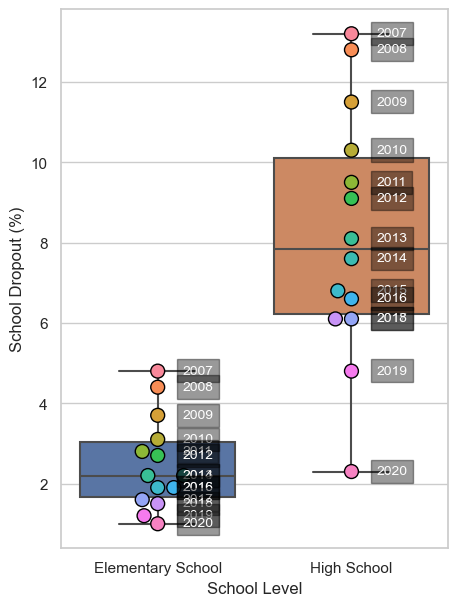

In [14]:
plt.figure(figsize=(5,7))
sns.set(style="whitegrid")
ax = sns.boxplot(x='Level', y="Dropout", data=totals_transformed, showfliers = True)
ax = sns.swarmplot(x='Level', y="Dropout", data=totals_transformed, hue='Year', edgecolor='black', linewidth=1.0, s=10)
ax.set_xlabel("School Level")
ax.set_ylabel("School Dropout (%)")
code = {'Elementary School': 0, 'High School': 1}
for index, row in totals_transformed.iterrows():
    plt.text(code[row.Level]+x_shift, row.Dropout-y_shift, row.Year, color='white', fontsize='small'
            , bbox=dict(facecolor='black', alpha=0.4, edgecolor='black')
             )
# # ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.legend().remove()
plt.show()

In [15]:
# uncomment to install dependency
#!pip install ThymeBoost 

In [16]:
totals.index = totals.Ano

In [17]:
series = totals.drop(columns='Ano', axis=1).rename(columns={'Total - EF': 'Elementary School',
                                                    'Total - EM': 'High School'})
series

,Elementary School,High School
Ano,,
2007,4.8,13.2
2008,4.4,12.8
2009,3.7,11.5
2010,3.1,10.3
2011,2.8,9.5
2012,2.7,9.1
2013,2.2,8.1
2014,2.2,7.6
2015,1.9,6.8


<https://github.com/tblume1992/ThymeBoost>

## Training the model with a linear estimator

In [148]:
def plot_results(fitted_df, title=None, xlabel=None, ylabel=None, predicted_df=None, figsize=None, ax=None):
    """Simple plot of results for convenience"""
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    ax.plot(fitted_df['y'], color='black')
    ax.plot(fitted_df['yhat'], color='orange')
    ax.plot(fitted_df['yhat_upper'],
            linestyle='dashed',
            alpha=.5,
            color='orange')
    ax.plot(fitted_df['yhat_lower'],
            linestyle='dashed',
            alpha=.5,
            color='orange')
    if predicted_df is not None:
        ax.plot(fitted_df['yhat'].tail(1).append(predicted_df['predictions']),
                color='red',
                linestyle='dashed')
        ax.fill_between(x=fitted_df['yhat_lower'].tail(1).append(predicted_df['predicted_lower']).index,
                        y1=fitted_df['yhat_lower'].tail(1).append(predicted_df['predicted_lower']).values,
                        y2=fitted_df['yhat_upper'].tail(1).append(predicted_df['predicted_upper']).values,
                        alpha=.5,
                        color='orange')
    if title is None:
        ax.set_title('ThymeBoost Results')
    else:
        ax.set_title(title)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if 'outliers' in fitted_df.columns:
        outlier_df = fitted_df[fitted_df['outliers'] == True]
        ax.scatter(outlier_df.index, outlier_df['y'], marker='x', color='red')

In [149]:
from ThymeBoost import ThymeBoost as tb


def train(series, trend_estimator='linear', seasonal_estimator='fourier', seasonal_period=0, split_cost='mse', global_cost='maicc', fit_type='global'):
    boosted_model = tb.ThymeBoost(approximate_splits=True,
                                n_split_proposals=25,
                                verbose=0,
                                cost_penalty=.001)
    output = boosted_model.fit(series,
                            trend_estimator=trend_estimator,
                            seasonal_estimator=seasonal_estimator,
                            seasonal_period=seasonal_period,
                            split_cost=split_cost,
                            global_cost=global_cost,
                            fit_type=fit_type)
    return output

In [153]:
xlabel = 'Year'
ylabel = 'Dropout Rate (%)'

variable1 = 'Elementary School'
variable2 = 'High School'

plotting_infos = [{'fitted_df': train(series[variable1]), 'title': 'Linear Estimator', 'xlabel': xlabel, 'ylabel': f'{variable1} {ylabel}'},
                 {'fitted_df': train(series[variable1], trend_estimator='arima'), 'title': 'Arima Estimator', 'xlabel': xlabel, 'ylabel': f'{variable1} {ylabel}'},
                 {'fitted_df': train(series[variable1], trend_estimator='mean'), 'title': 'Mean Estimator', 'xlabel': xlabel, 'ylabel': f'{variable1} {ylabel}'},
                 {'fitted_df': train(series[variable2]), 'title': 'Linear Estimator', 'xlabel': xlabel, 'ylabel': f'{variable2} {ylabel}'},
                 {'fitted_df': train(series[variable2], trend_estimator='arima'), 'title': 'Arima Estimator', 'xlabel': xlabel, 'ylabel': f'{variable2} {ylabel}'},
                 {'fitted_df': train(series[variable2], trend_estimator='mean'), 'title': 'Mean Estimator', 'xlabel': xlabel, 'ylabel': f'{variable2} {ylabel}'}]

In [158]:
from matplotlib import pyplot as plt

def plot_grid(functions_and_parameters, n_cols=3, values_mapping=None, width_scale=5.5, height_scale=4):
    Tot = len(functions_and_parameters)
    # Compute Rows required
    n_rows = Tot // n_cols
    n_rows += Tot % n_cols
    fig = plt.figure(1)
    fig.set_figwidth(n_cols*width_scale)
    fig.set_figheight(n_rows*height_scale)
    for position, functions_and_parameter in enumerate(functions_and_parameters):
        ax = fig.add_subplot(n_rows, n_cols, position+1)
        kwargs = {'ax': ax}
        function = functions_and_parameter[0]
        parameters = functions_and_parameter[1]
        function(**parameters, **kwargs)
    plt.show()

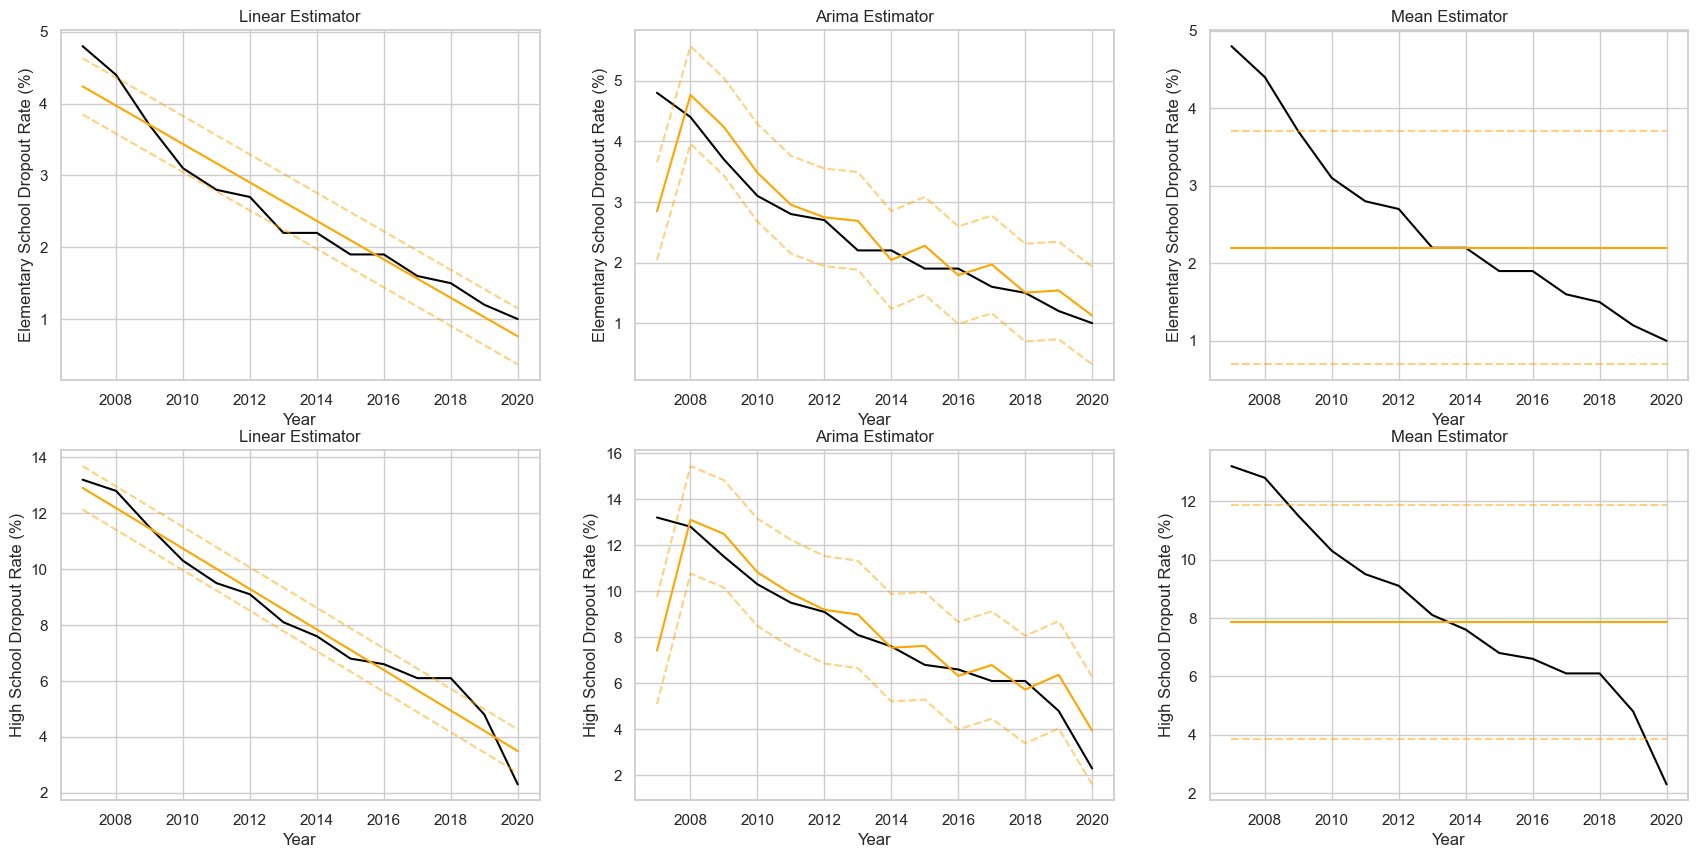

In [159]:
plot_grid([[plot_results, plotting_info] for plotting_info in plotting_infos], n_cols=3, width_scale=7, height_scale=5)

series_years_before = series.drop(index=2020)
series_years_before

predicted_output = boosted_model.predict(output_only_years_before, 1)

predicted_output.index = [2020]

predicted_output

output[output.index == 2020]